This notebook shows how to read the file created by concatenating all mseed files for a period of time and merge it into one stream. We fetch 2 hours of hydrophone data around the peak of the solar eclipse on August 21, 2017 using the function `get_mseed` from the [`mseed_util.py`](https://github.com/oceanhackweek/cahw2018_hydrophone/blob/master/programs/mseed_util.py) program. To run this notebook, download the [`hydrophone.mseed`](https://www.dropbox.com/s/dfif52clnzs1jtk/hydrophone.mseed?dl=0) and store in the `data` folder. [`hydrophone.mseed`](https://www.dropbox.com/s/dfif52clnzs1jtk/hydrophone.mseed?dl=0).

We will use the `obspy` library for the next steps.

In [8]:
import obspy

In [23]:
%matplotlib inline

#### Reading the data

In [19]:
eclipse_sounds = obspy.read('../data/hydrophone.mseed')
eclipse_sounds_meta = obspy.read('../data/hydrophone.mseed',headonly=True)

In [14]:
eclipse_sounds_meta

1591 Trace(s) in Stream:

OO.HYVM2..YDH | 2017-08-21T09:00:00.000000Z - 2017-08-21T09:00:22.654547Z | 64000.0 Hz, 1449892 samples
...
(1589 other traces)
...
OO.HYVM2..YDH | 2017-08-21T10:15:06.355688Z - 2017-08-21T10:15:06.605672Z | 64000.0 Hz, 16000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

We observe that the this file contains many streams (each coming from the original file). We can merge those using the obspy `merge` function.

#### Merging the stream

In [20]:
eclipse_sounds.merge(fill_value='interpolate')

1 Trace(s) in Stream:
OO.HYVM2..YDH | 2017-08-21T09:00:00.000000Z - 2017-08-21T11:00:04.450547Z | 64000.0 Hz, 461084836 samples

Now there is only one stream inside. Note: we used interpolation to fill the gaps in the stream. If we do not do that the format of the stream is masked array and it is problematic to store the output, but we can certainly preserve the missing values if needed.

#### Writing the merged file

In [21]:
eclipse_sounds.write('merged_hydrophone.mseed')

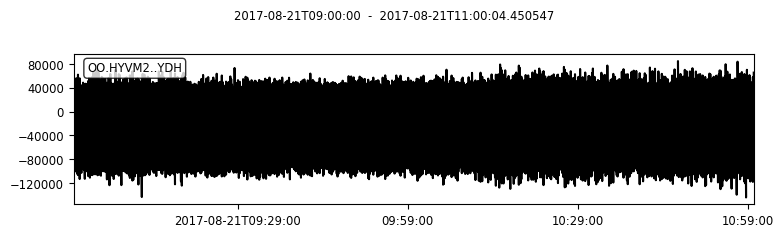

In [24]:
eclipse_sounds.plot()